1. Importanta atributelor

In [5]:
import pandas as pd

file_path = '/Users/user/Documents/GitHub/FacultateAI/Homework/dataset.xlsx' 
data = pd.read_excel(file_path)

print(data.head())

atribute = data.columns
print("Atributele din setul de date sunt:")
print(atribute)


   Row.names              Horodateur Sexe       Age Race Nombre Logement Zone  \
0          1 2021-02-09 16:36:39.042    F  Moinsde1  SBI      3      ASB    U   
1         10 2021-02-12 18:25:58.373    F  Moinsde1  SBI      1      AAB    U   
2        100 2021-03-06 22:04:33.192    F      2a10  EUR      4       ML    U   
3       1000 2021-02-18 16:10:11.117    F  Moinsde1  EUR      1       ML    R   
4       1001 2021-02-18 18:00:50.851    F       1a2  SBI      2       MI    R   

   Ext  Obs  ...  Brutal  Dominant  Agressif  Impulsif  Prévisible  Distrait  \
0    0    0  ...       1         1         1         1           1         1   
1    0    2  ...       2         2         3         4           4         3   
2    0    2  ...       1         1         1         2           4         2   
3    2    2  ...       4         3         3         3           4         4   
4    1    2  ...       2         4         1         4           3         3   

   Abondance  PredOiseau  PredMa

In [7]:
atribute_formatate = " | ".join(atribute)
print("Atributele din setul de date sunt:")
print(atribute_formatate)


Atributele din setul de date sunt:
Row.names | Horodateur | Sexe | Age | Race | Nombre | Logement | Zone | Ext | Obs | Timide | Calme | Effrayé | Intelligent | Vigilant | Perséverant | Affectueux | Amical | Solitaire | Brutal | Dominant | Agressif | Impulsif | Prévisible | Distrait | Abondance | PredOiseau | PredMamm | Plus


In [18]:
from googletrans import Translator

file_path = '/Users/user/Documents/GitHub/FacultateAI/Homework/dataset.xlsx' 
data = pd.read_excel(file_path)

atribute = list(data.columns)

translator = Translator()

atribute_traduse = [translator.translate(atribut, src='fr', dest='en').text for atribut in atribute]

print(atribute_formatate)
print(" | ".join(atribute_traduse))


Row.names | Horodateur | Sexe | Age | Race | Nombre | Logement | Zone | Ext | Obs | Timide | Calme | Effrayé | Intelligent | Vigilant | Perséverant | Affectueux | Amical | Solitaire | Brutal | Dominant | Agressif | Impulsif | Prévisible | Distrait | Abondance | PredOiseau | PredMamm | Plus
ROW.NAMES | Parliament | Sex | Age | Breed | Number | Accommodation | Area | Outdoor | Obs | Shy | Calm | Afraid | Clever | Vigilant | Persevering | Affectionate | Friendly | Lonely | Brutal | Dominant | Aggressive | Impulsive | Predictable | Distracted | Abundance | Predoiseau | Predmamm | More


Atribute de care sa scapam :
- Horodateur = data pisicii
- Sexe = ce sex are (nu conteaza F sau M in predictia modelului)
- Age = la fel nu conteaza
- Logement = unde o tii (apartament cu doua camere, casa) de ce ar conta asta ?

In [24]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Coloane non-numerice:", non_numeric_columns)


Coloane non-numerice: Index(['Horodateur', 'Sexe', 'Age', 'Race', 'Nombre', 'Logement', 'Zone',
       'Abondance', 'Plus'],
      dtype='object')


In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Sexe', 'Race', 'Zone', 'Abondance', 'Plus']  

encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

print(data[categorical_columns])


      Sexe  Race  Zone  Abondance  Plus
0        0    12     2          3   803
1        0    12     2          3   803
2        0     4     2          3   257
3        0     4     1          2   288
4        0    12     1          2   803
...    ...   ...   ...        ...   ...
3138     0     9     1          2   519
3139     0     5     1          2   803
3140     1     0     0          2   803
3141     1     1     1          2   803
3142     0     1     0          2   803

[3143 rows x 5 columns]


In [27]:
print(data.columns)

Index(['Row.names', 'Horodateur', 'Sexe', 'Age', 'Race', 'Nombre', 'Logement',
       'Zone', 'Ext', 'Obs', 'Timide', 'Calme', 'Effrayé', 'Intelligent',
       'Vigilant', 'Perséverant', 'Affectueux', 'Amical', 'Solitaire',
       'Brutal', 'Dominant', 'Agressif', 'Impulsif', 'Prévisible', 'Distrait',
       'Abondance', 'PredOiseau', 'PredMamm', 'Plus'],
      dtype='object')


In [56]:
coloane_de_eliminat = ['Horodateur', 'Sexe', 'Age', 'Logement', 'Plus']

data_reduced = data.drop(columns=coloane_de_eliminat)
#coloana_plus = data['Plus']

print(data_reduced.head())
print(data.head())




   Row.names  Race Nombre  Zone  Ext  Obs  Timide  Calme  Effrayé  \
0          1    12      3     2    0    0       1      1        1   
1         10    12      1     2    0    2       1      1        3   
2        100     4      4     2    0    2       4      4        3   
3       1000     4      1     1    2    2       3      2        2   
4       1001    12      2     1    1    2       1      4        1   

   Intelligent  ...  Solitaire  Brutal  Dominant  Agressif  Impulsif  \
0            1  ...          1       1         1         1         1   
1            4  ...          1       2         2         3         4   
2            5  ...          2       1         1         1         2   
3            4  ...          3       4         3         3         3   
4            5  ...          1       2         4         1         4   

   Prévisible  Distrait  Abondance  PredOiseau  PredMamm  
0           1         1          3           4         4  
1           4         3          3

In [ ]:
for index, atribut in data['Nombre'].items():
    if atribut == 6: # initial era Plusde5 
        data.at[index, 'Nombre'] = '6'
        
for atribut in data['Nombre']:
    print(atribut)


In [60]:
noul_fisier = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat.xlsx'
data_reduced.to_excel(noul_fisier, index=False) 
print(f"Datasetul curățat a fost salvat în {noul_fisier}")

Datasetul curățat a fost salvat în /Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat.xlsx


In [ ]:
import pandas as pd

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat.xlsx'
data = pd.read_excel(file_path)

data['Nombre'] = pd.to_numeric(data['Nombre'], errors='coerce')

#print(data['Nombre'])


In [65]:
import pandas as pd

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat.xlsx'
data = pd.read_excel(file_path)

data_cleaned = data.drop_duplicates()

output_file = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat_v2.xlsx'
data_cleaned.to_excel(output_file, index=False)

print(f"Fișierul curățat a fost salvat la: {output_file}")


Fișierul curățat a fost salvat la: /Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat_v2.xlsx


Zone
1    1227
2    1100
0     816
Name: count, dtype: int64


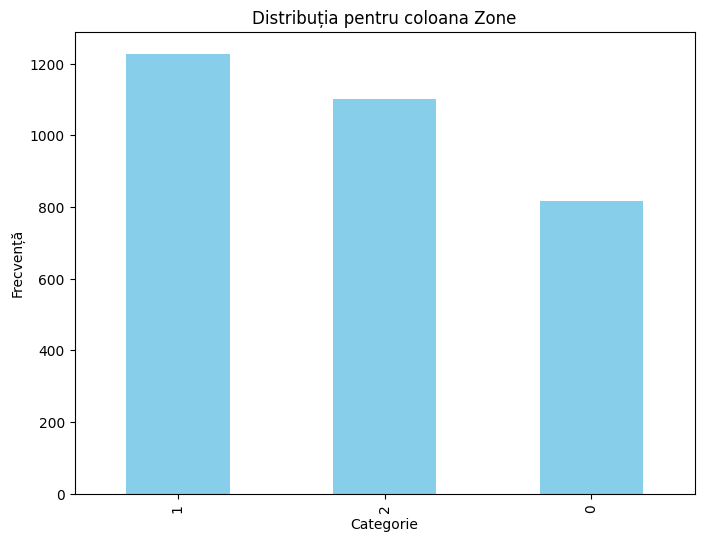

In [70]:
import matplotlib.pyplot as plt

distributie = data['Zone'].value_counts()

print(distributie)

distributie.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distribuția pentru coloana Zone')
plt.xlabel('Categorie')
plt.ylabel('Frecvență')
plt.show()


Histogramă pentru coloana Row.names


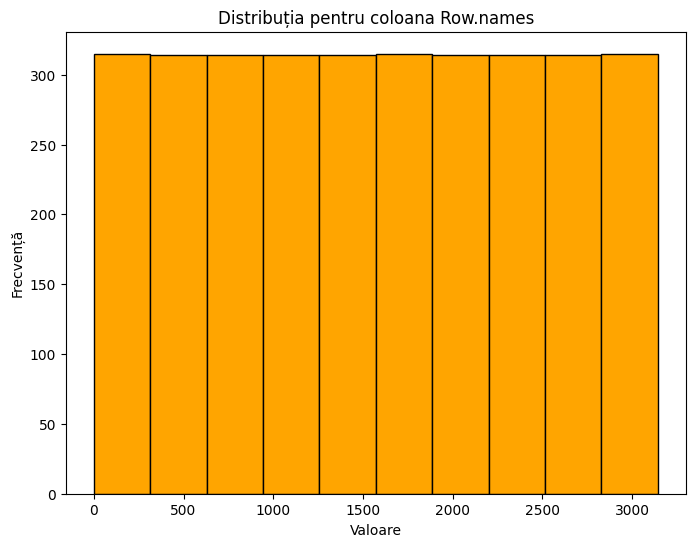

Histogramă pentru coloana Race


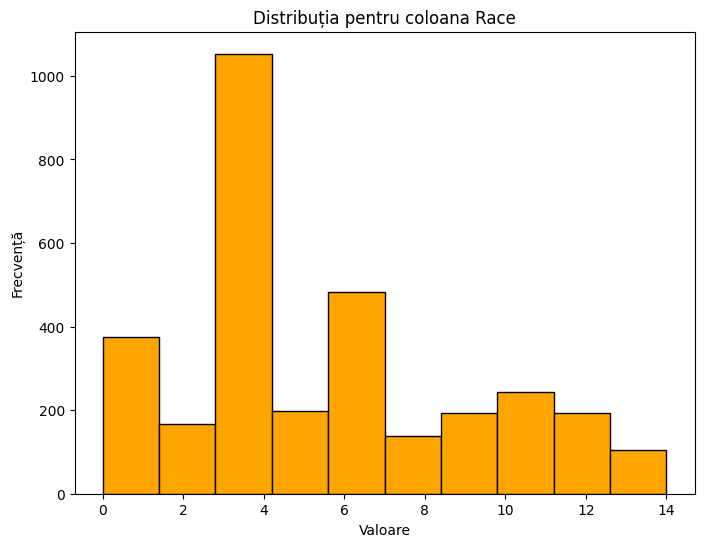

Histogramă pentru coloana Nombre


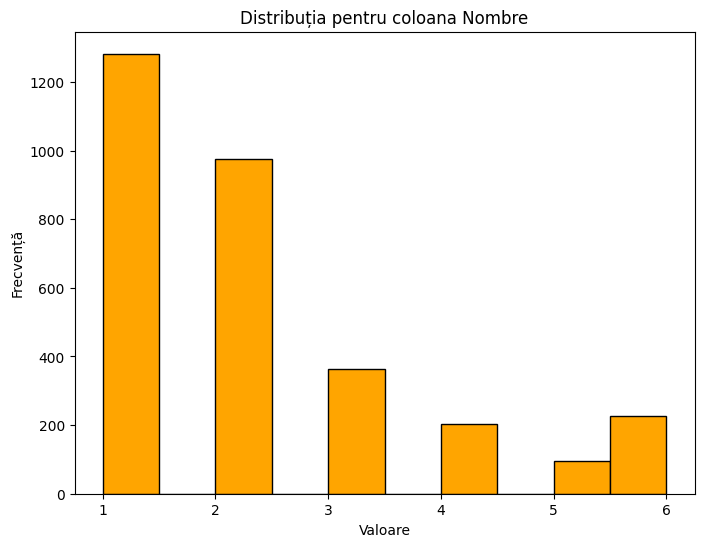

Histogramă pentru coloana Zone


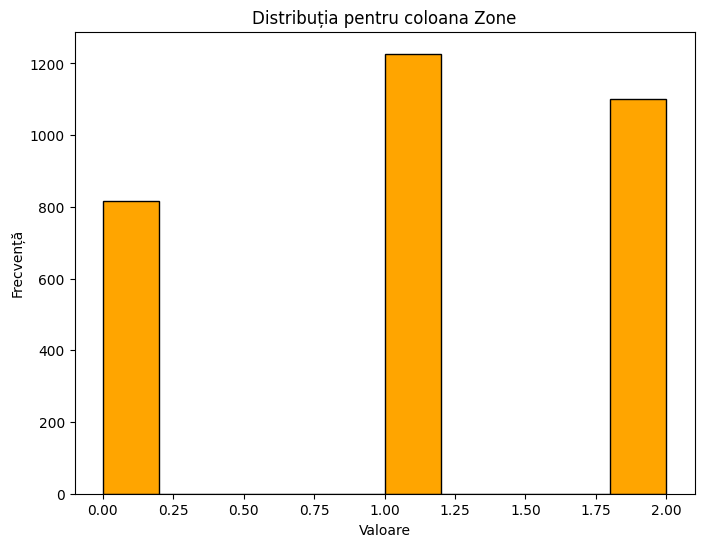

Histogramă pentru coloana Ext


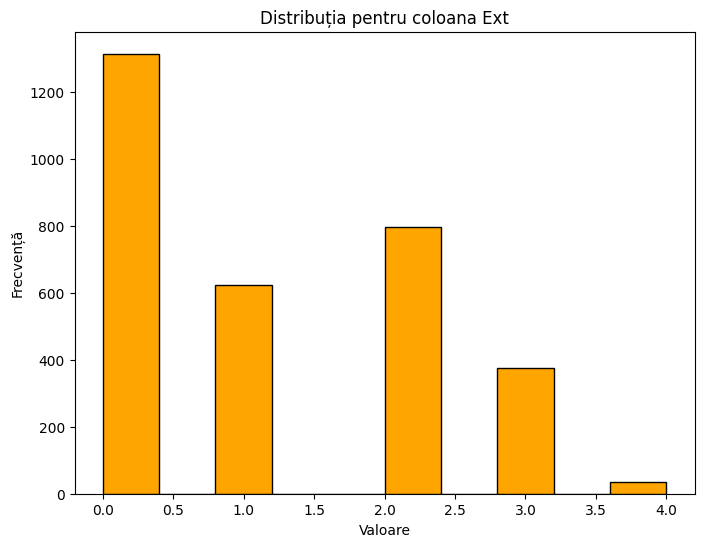

Histogramă pentru coloana Obs


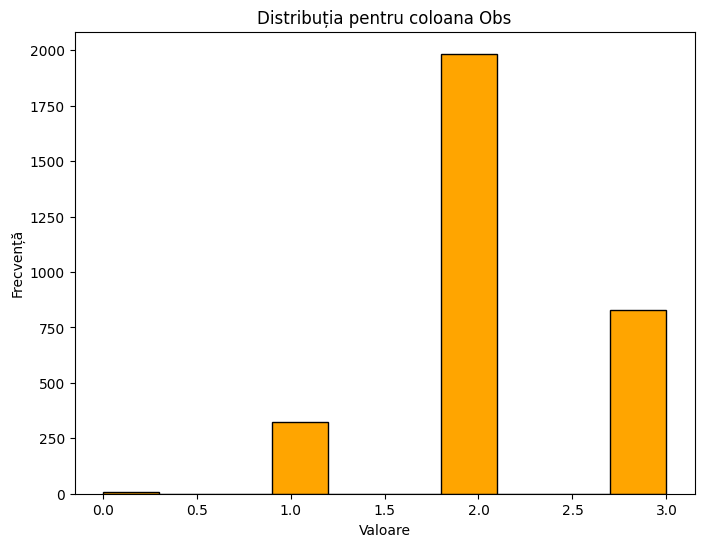

Histogramă pentru coloana Timide


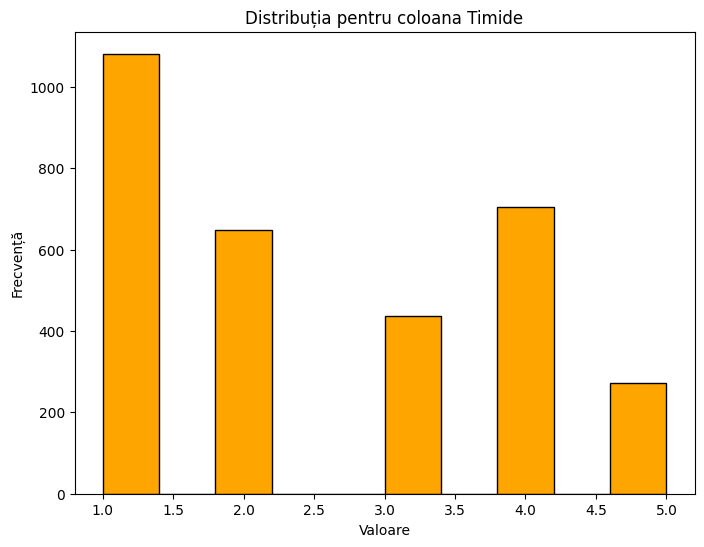

Histogramă pentru coloana Calme


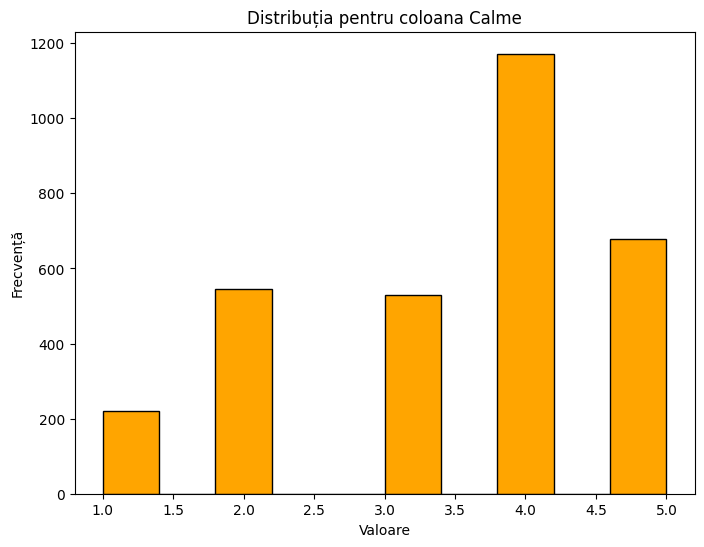

Histogramă pentru coloana Effrayé


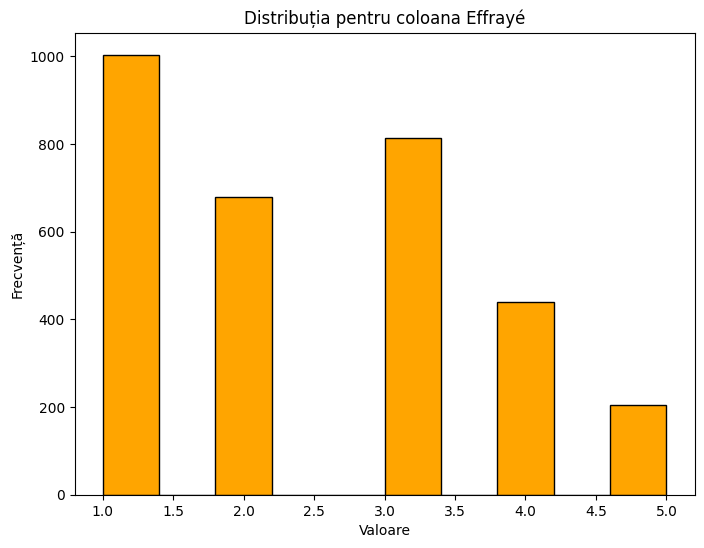

Histogramă pentru coloana Intelligent


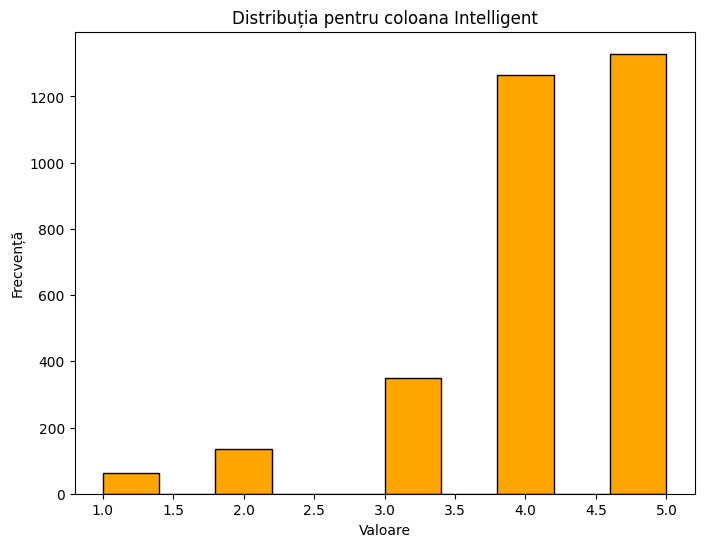

Histogramă pentru coloana Vigilant


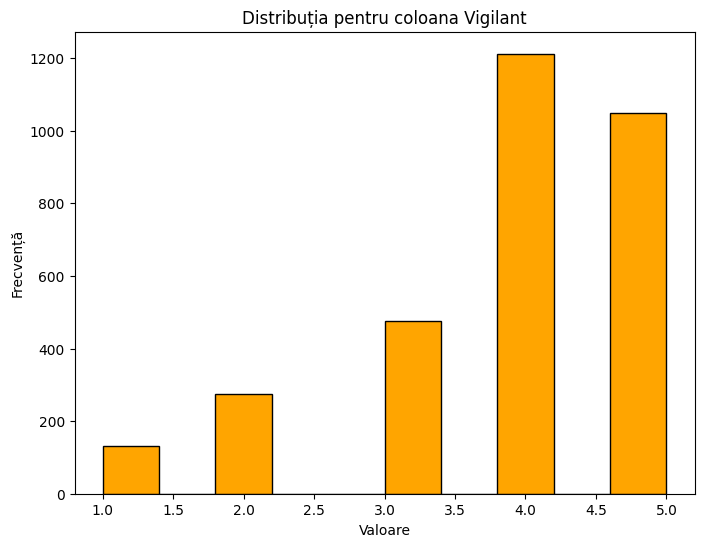

Histogramă pentru coloana Perséverant


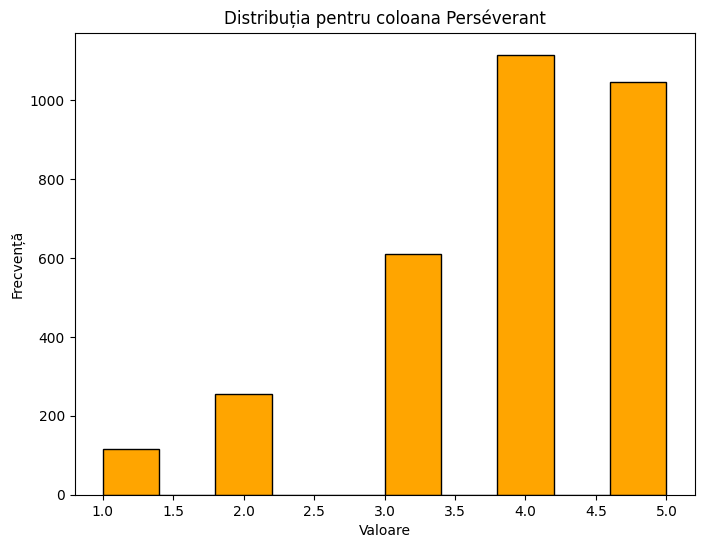

Histogramă pentru coloana Affectueux


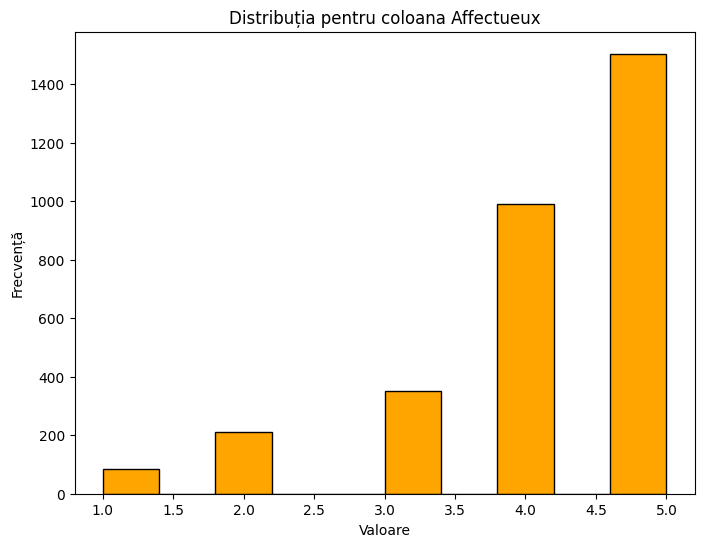

Histogramă pentru coloana Amical


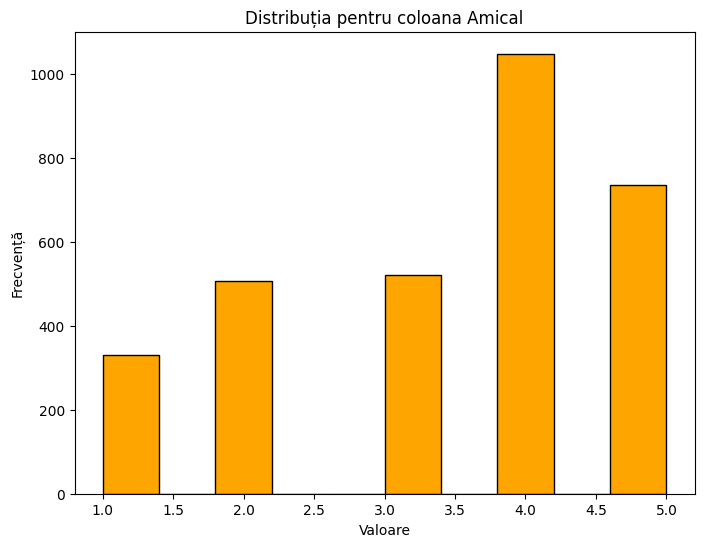

Histogramă pentru coloana Solitaire


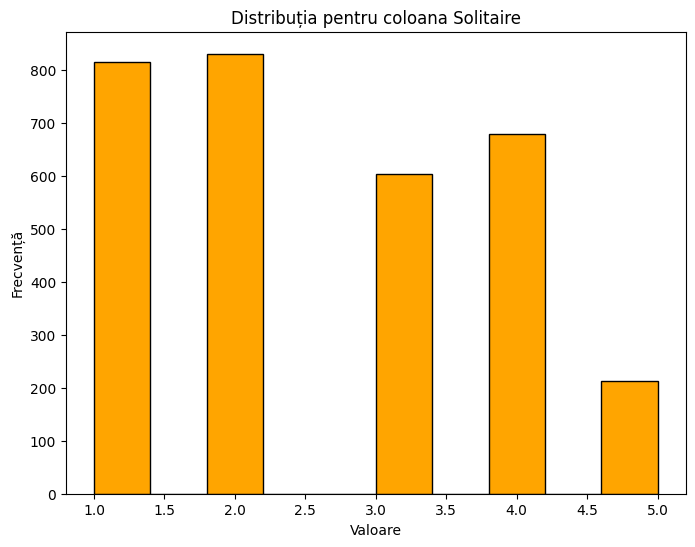

Histogramă pentru coloana Brutal


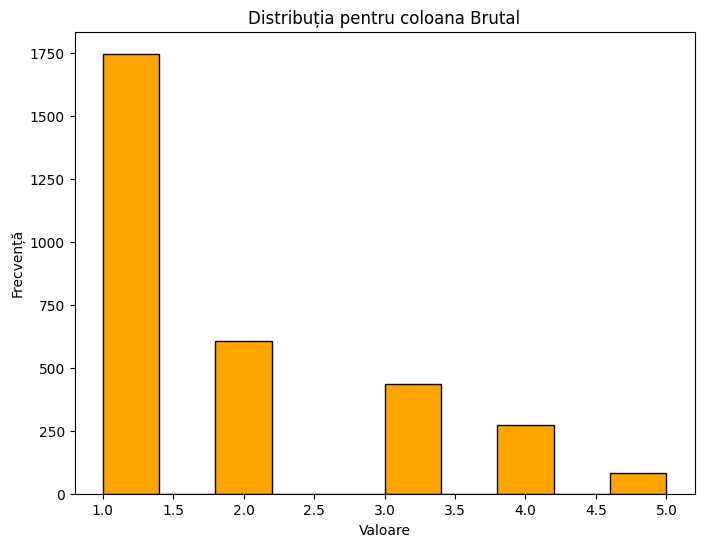

Histogramă pentru coloana Dominant


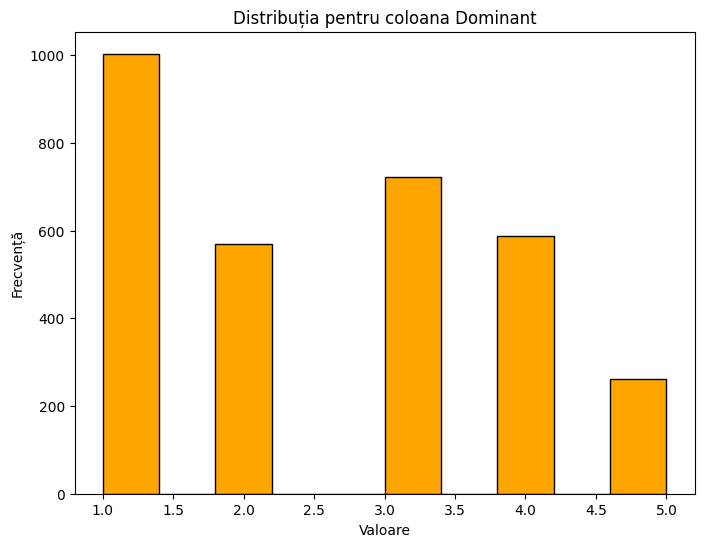

Histogramă pentru coloana Agressif


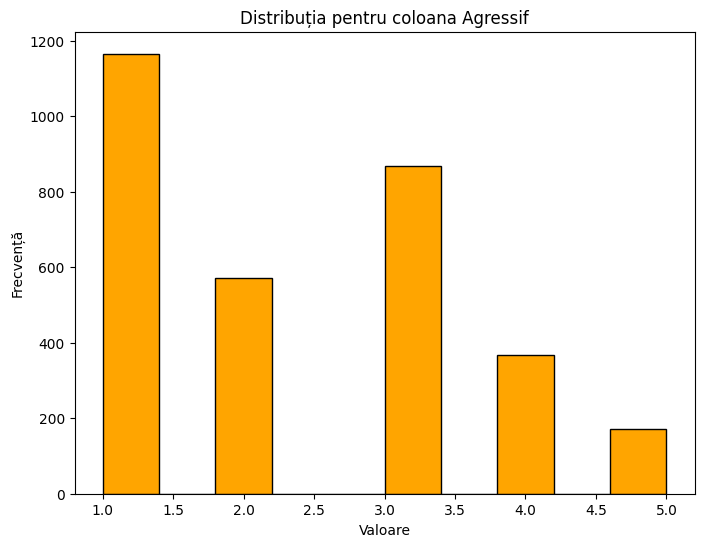

Histogramă pentru coloana Impulsif


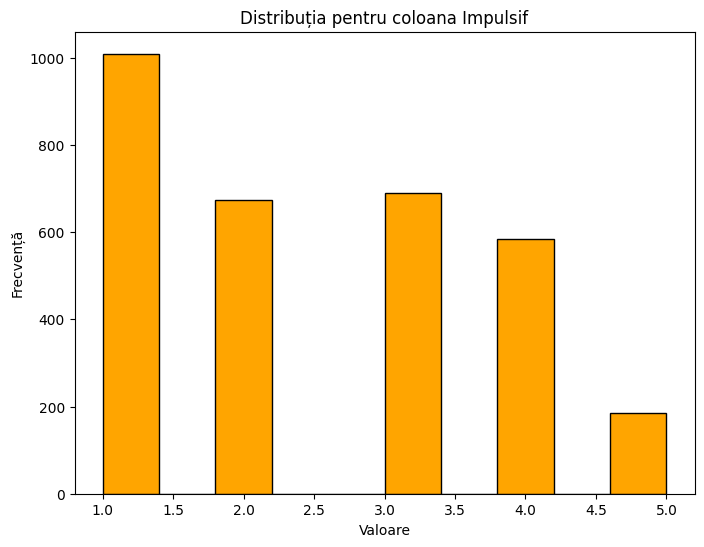

Histogramă pentru coloana Prévisible


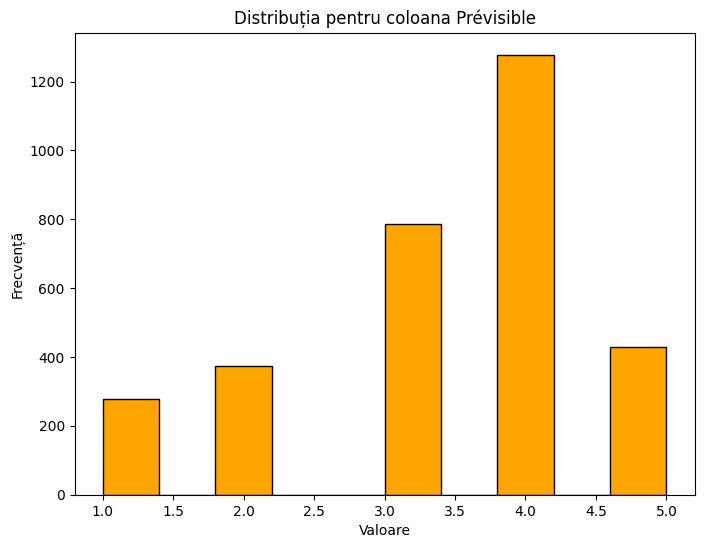

Histogramă pentru coloana Distrait


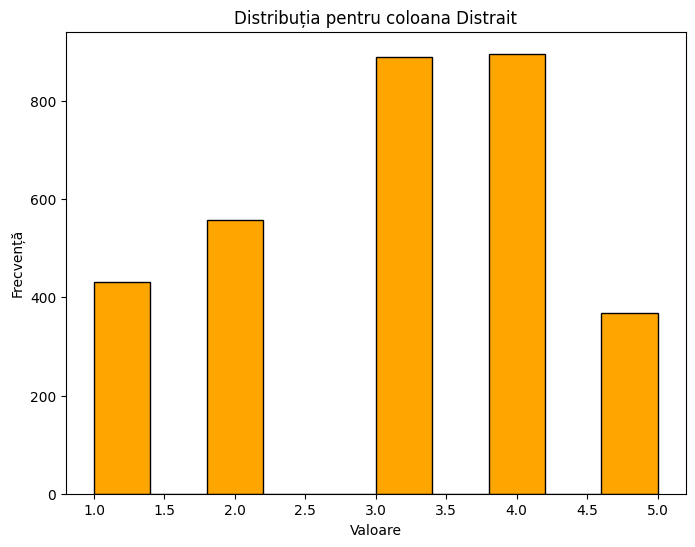

Histogramă pentru coloana Abondance


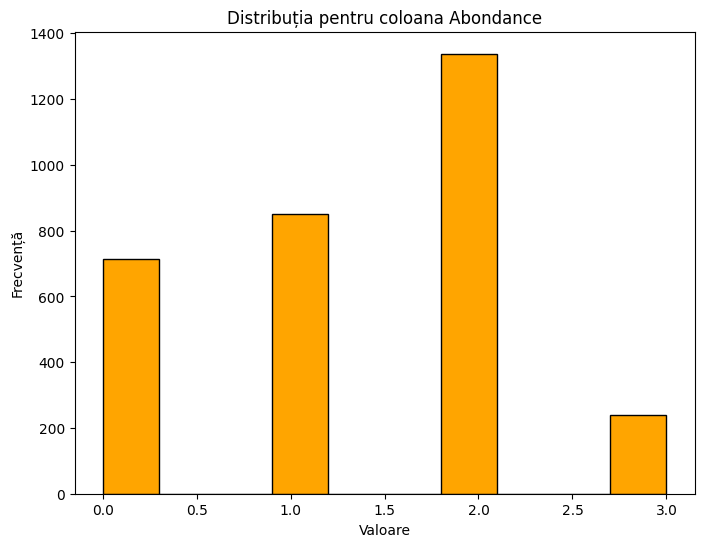

Histogramă pentru coloana PredOiseau


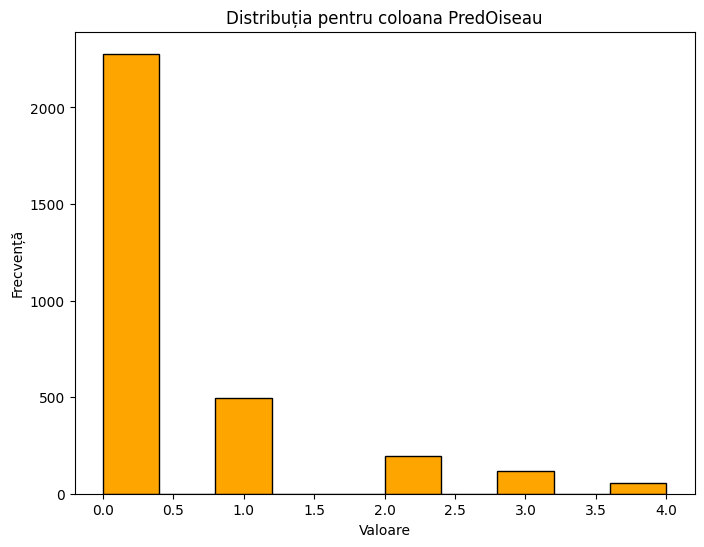

Histogramă pentru coloana PredMamm


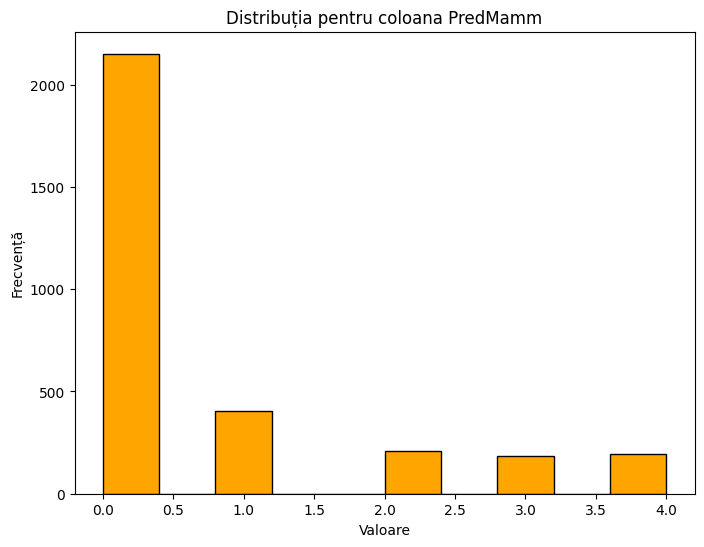

In [69]:
import matplotlib.pyplot as plt

for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':  
        distributie = data_cleaned[column].value_counts()
        
        print(f"Distribuția pentru coloana {column}:\n{distributie}\n")
        
        distributie.plot(kind='bar', color='skyblue', figsize=(8, 6))
        plt.title(f'Distribuția pentru coloana {column}')
        plt.xlabel('Categorie')
        plt.ylabel('Frecvență')
        plt.show()
        
    elif data_cleaned[column].dtype in ['int64', 'float64']:
        print(f"Histogramă pentru coloana {column}")
        
        data_cleaned[column].plot(kind='hist', bins=10, color='orange', edgecolor='black', figsize=(8, 6))
        plt.title(f'Distribuția pentru coloana {column}')
        plt.xlabel('Valoare')
        plt.ylabel('Frecvență')
        plt.show()


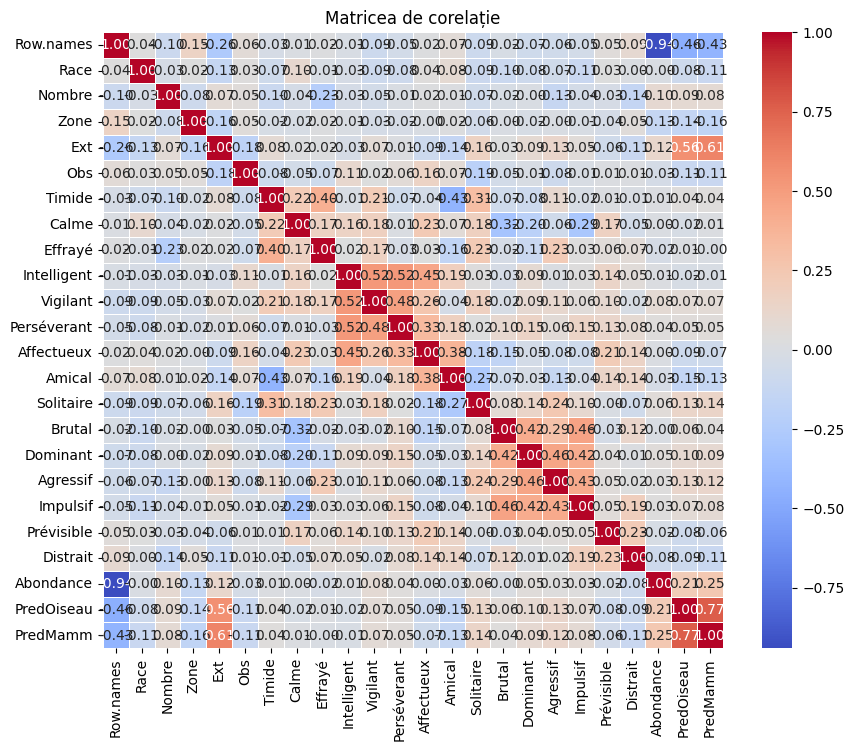

Atributele redundante sunt: {('Abondance', 'Row.names'), ('Row.names', 'Abondance')}


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matricea de corelație")
plt.show()

threshold = 0.9
redundant_columns = set()
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if abs(correlation_matrix.loc[row, col]) > threshold and row != col:
            redundant_columns.add((row, col))

print("Atributele redundante sunt:", redundant_columns)


In [ ]:
"""
!!!! Sunt atribute cu distributii dezechilibrate
-   pentru PredMamm : 0 - nu vaneaza
                      1 - vaneaza foarte rar
                      2 - vaneaza rar , etc.
                      Ce vreau sa fac ?
                        - Combin valorile (1-5) intr o singura valoare : 1 (pentru a echilibra cumva distributia)
                        - 0 - NU vaneaza mamifere
                        - 1 - vaneaza mamifere
- pentru PredOiseau - la fel ca la PredMamm
- pentru a nu elimina complet atributele 
"""

In [75]:
data_cleaned['PredMamm'] = data_cleaned['PredMamm'].apply(lambda x: 1 if x > 0 else 0)

print(data_cleaned['PredMamm'].value_counts())

output_path = 'dataset_curatat_v2.xlsx'  
data_cleaned.to_excel(output_path, index=False)

print(f"Datele modificate au fost salvate in {output_path}")


PredMamm
0    2151
1     992
Name: count, dtype: int64
Datele modificate au fost salvate in dataset_curatat_v2.xlsx


PredMamm
0    2151
1     404
2     208
4     196
3     184
Name: count, dtype: int64


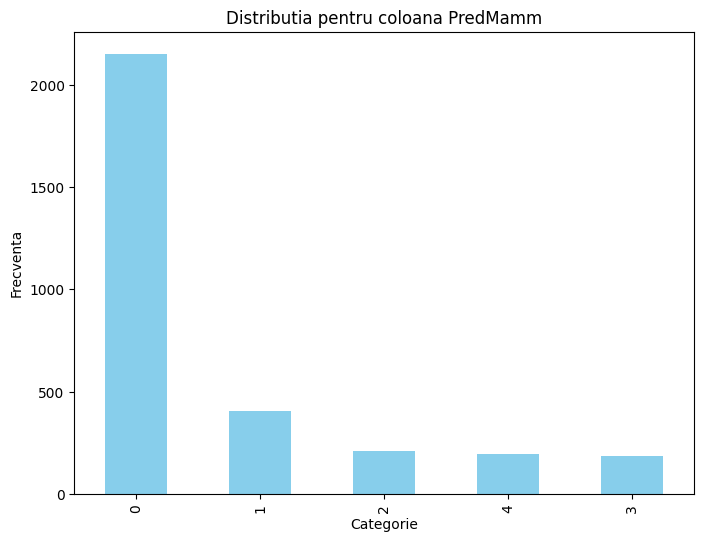

In [77]:
import matplotlib.pyplot as plt

distributie = data['PredMamm'].value_counts()

print(distributie)

distributie.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distributia pentru coloana PredMamm')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

PredMamm
0    2151
1     992
Name: count, dtype: int64


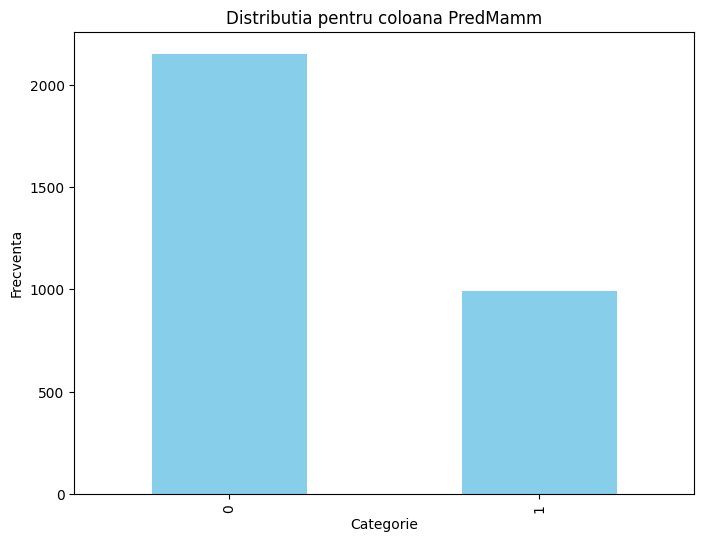

In [76]:
import matplotlib.pyplot as plt

distributie = data_cleaned['PredMamm'].value_counts()

print(distributie)

distributie.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distributia pentru coloana PredMamm')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

PredOiseau
0    2278
1     496
2     196
3     116
4      57
Name: count, dtype: int64


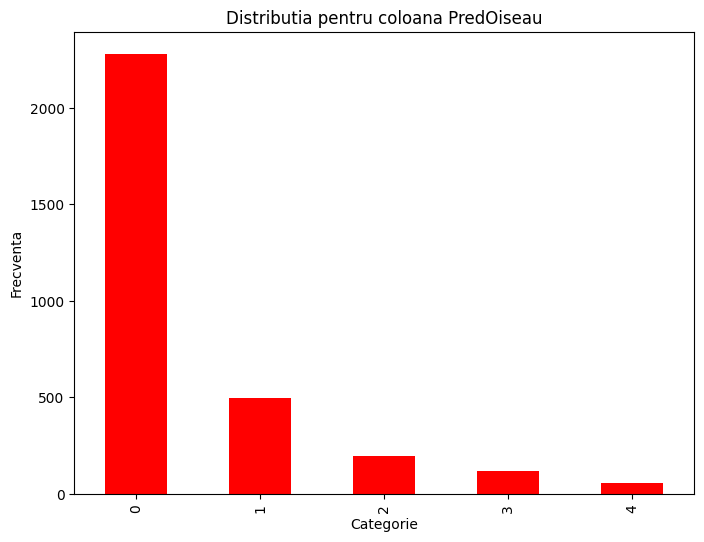

In [78]:
import matplotlib.pyplot as plt

distributie = data_cleaned['PredOiseau'].value_counts()

print(distributie)

distributie.plot(kind= 'bar', color='red', figsize=(8,6))
plt.title('Distributia pentru coloana PredOiseau')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

In [81]:
data_cleaned['PredOiseau'] = data_cleaned['PredOiseau'].apply(lambda x: 1 if x > 0 else 0)

print(data_cleaned['PredOiseau'].value_counts())

output_path = 'dataset_curatat_v2.xlsx'  
data_cleaned.to_excel(output_path, index=False)

print(f"Datele modificate au fost salvate in {output_path}")




PredOiseau
0    2278
1     865
Name: count, dtype: int64
Numarul total de valori: 3143
0 - 72 %
Datele modificate au fost salvate in dataset_curatat_v2.xlsx


In [84]:
print(f"Numarul total de valori: {data_cleaned['PredOiseau'].count()}")

print(f"0 - {227800/3143} %")
print(f"1 - {86500/3143} %")
#x% din 3143 = 2278
# 3143 x = 227800
# 3143 x = 86500

Numarul total de valori: 3143
0 - 72.47852370346803 %
1 - 27.521476296531976 %


PredOiseau
0    2278
1     865
Name: count, dtype: int64


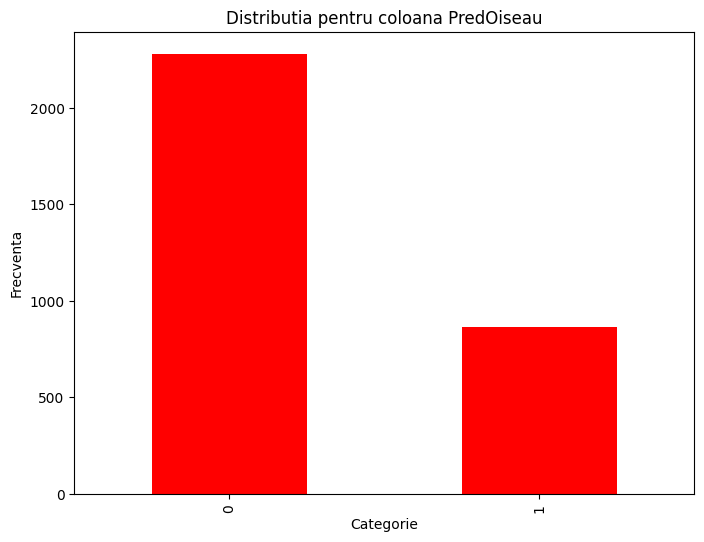

In [85]:
import matplotlib.pyplot as plt

distributie = data_cleaned['PredOiseau'].value_counts()

print(distributie)

distributie.plot(kind= 'bar', color='red', figsize=(8,6))
plt.title('Distributia pentru coloana PredOiseau')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

Obs
2    1984
3     827
1     323
0       9
Name: count, dtype: int64


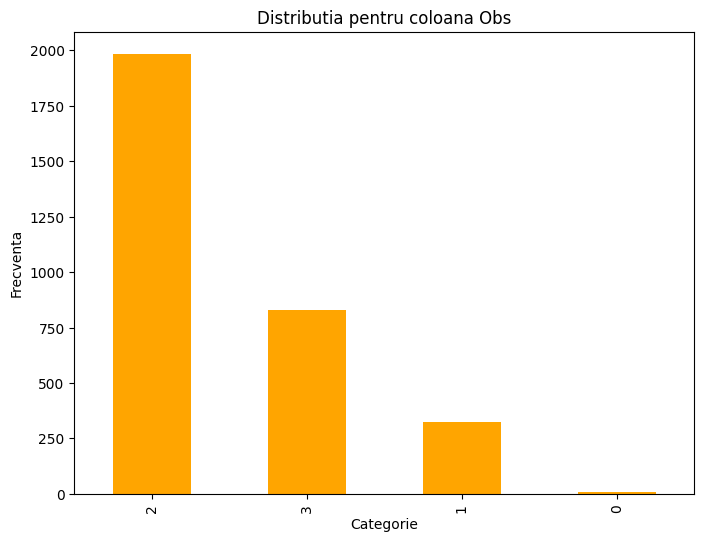

In [86]:
import matplotlib.pyplot as plt

distributie = data_cleaned['Obs'].value_counts()

print(distributie)

distributie.plot(kind= 'bar', color='orange', figsize=(8,6))
plt.title('Distributia pentru coloana Obs')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

- Avem 9 valori de 0 din mai mult de 3 mii, asa ca le vom trece la 1 pe toate 9 

In [88]:
data_cleaned['Obs'] = data_cleaned['Obs'].apply(lambda x: 1 if x < 1 else x)

print(data_cleaned['Obs'].value_counts())

output_path = 'dataset_curatat_v2.xlsx'  
data_cleaned.to_excel(output_path, index=False)

print(f"Datele modificate au fost salvate in {output_path}")

Obs
2    1984
3     827
1     332
Name: count, dtype: int64
Datele modificate au fost salvate in dataset_curatat_v2.xlsx


Obs
2    1984
3     827
1     332
Name: count, dtype: int64


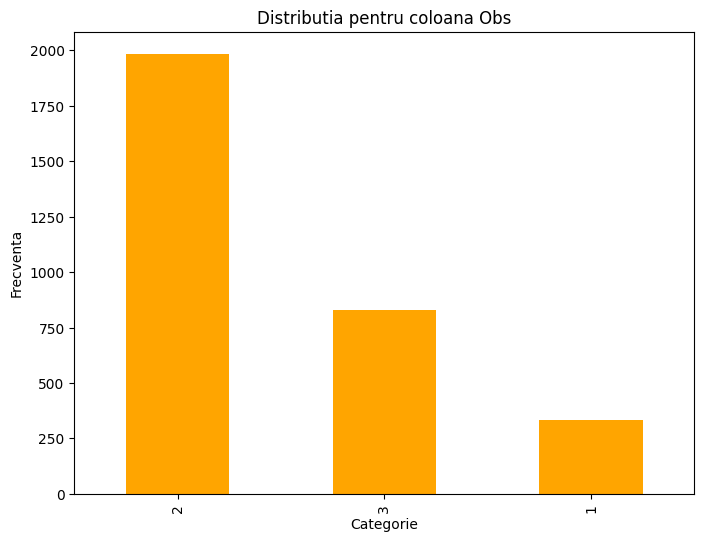

In [89]:
import matplotlib.pyplot as plt

distributie = data_cleaned['Obs'].value_counts()

print(distributie)

distributie.plot(kind= 'bar', color='orange', figsize=(8,6))
plt.title('Distributia pentru coloana Obs')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()


- Am modificat distributiile urmatoarelor atribute :
    - PredMamm
    - PredOiseau
    - Obs

In [107]:
import pandas as pd

coloana_eliminata = ['Row.names']
file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat_v2.xlsx'
data_cleaned = pd.read_excel(file_path)

data_cleaned = data_cleaned.drop(columns=coloana_eliminata)

noul_fisier = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat_final.xlsx'
data_cleaned.to_excel(noul_fisier, index=False)

print(data_cleaned.head())
print(f"Datasetul curatat a fost salvat in {noul_fisier}")


   Race  Nombre  Zone  Ext  Obs  Timide  Calme  Effrayé  Intelligent  \
0    12       3     2    0    1       1      1        1            1   
1    12       1     2    0    2       1      1        3            4   
2     4       4     2    0    2       4      4        3            5   
3     4       1     1    2    2       3      2        2            4   
4    12       2     1    1    2       1      4        1            5   

   Vigilant  ...  Solitaire  Brutal  Dominant  Agressif  Impulsif  Prévisible  \
0         1  ...          1       1         1         1         1           1   
1         4  ...          1       2         2         3         4           4   
2         5  ...          2       1         1         1         2           4   
3         3  ...          3       4         3         3         3           4   
4         3  ...          1       2         4         1         4           3   

   Distrait  Abondance  PredOiseau  PredMamm  
0         1          3           

In [99]:
noul_fisier = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat_v2.xlsx'
data_cleaned.to_excel(noul_fisier, index=False) 
print(f"Datasetul curatat a fost salvat in {noul_fisier}")

Datasetul curatat a fost salvat in /Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat_v2.xlsx


In [100]:
print(data_cleaned.head())

   Row.names  Race  Nombre  Zone  Ext  Obs  Timide  Calme  Effrayé  \
0          1    12       3     2    0    1       1      1        1   
1         10    12       1     2    0    2       1      1        3   
2        100     4       4     2    0    2       4      4        3   
3       1000     4       1     1    2    2       3      2        2   
4       1001    12       2     1    1    2       1      4        1   

   Intelligent  ...  Solitaire  Brutal  Dominant  Agressif  Impulsif  \
0            1  ...          1       1         1         1         1   
1            4  ...          1       2         2         3         4   
2            5  ...          2       1         1         1         2   
3            4  ...          3       4         3         3         3   
4            5  ...          1       2         4         1         4   

   Prévisible  Distrait  Abondance  PredOiseau  PredMamm  
0           1         1          3           1         1  
1           4         3     

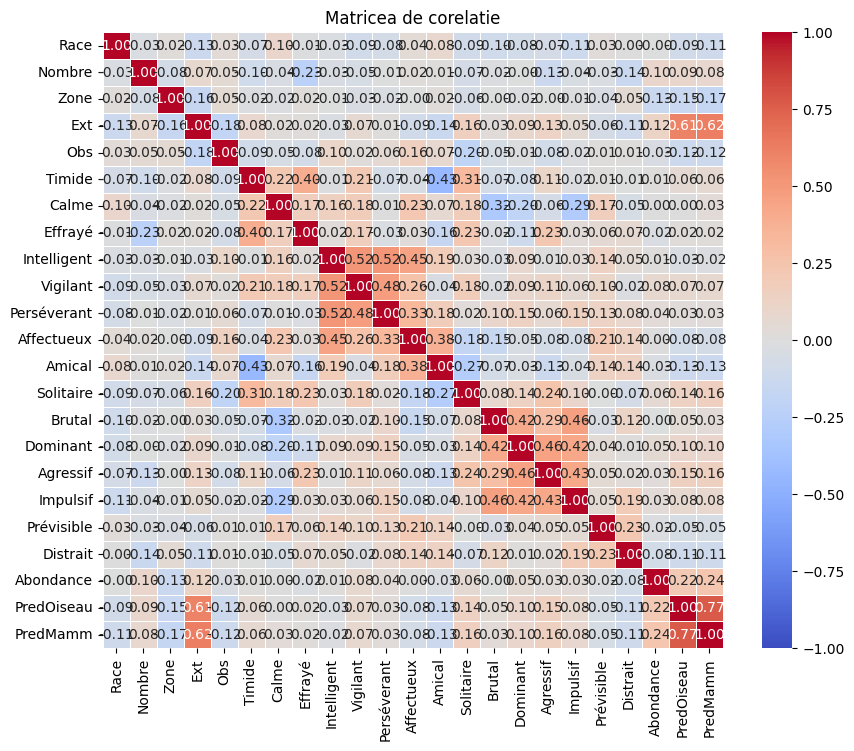

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat_final.xlsx'
data_cleaned = pd.read_excel(file_path)
correlation_matrix = data_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matricea de corelatie")
plt.show()

- PredMamm si PredOiseau au corelatie ridicata => sunt foarte similare
- Pred va fi noul atribut in care 0 = nu vaneaza si 1 = vaneaza

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat_final.xlsx'
data_cleaned = pd.read_excel(file_path)

data_cleaned['Pred'] = data_cleaned['PredMamm'] | data_cleaned['PredOiseau']
data_cleaned = data_cleaned.drop(columns=['PredMamm', 'PredOiseau'])
data_cleaned.to_excel('/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx', index=False)

Pred
0    2059
1    1084
Name: count, dtype: int64


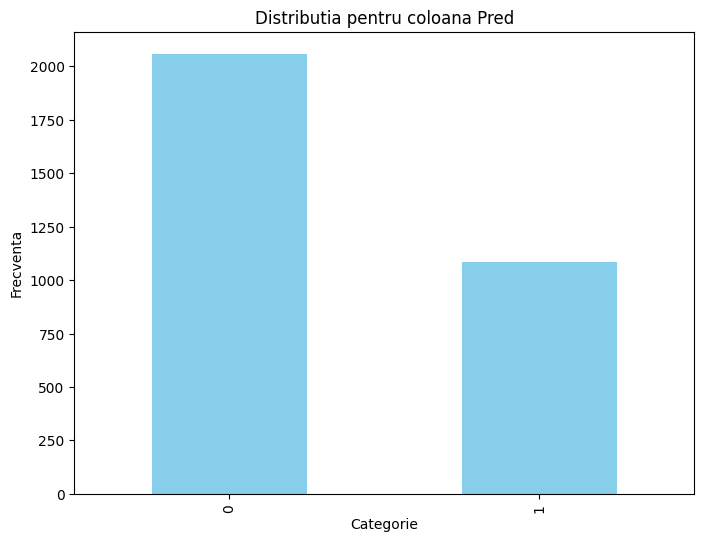

In [112]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

distributie = data_final['Pred'].value_counts()
print(distributie)

distributie.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distributia pentru coloana Pred')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()


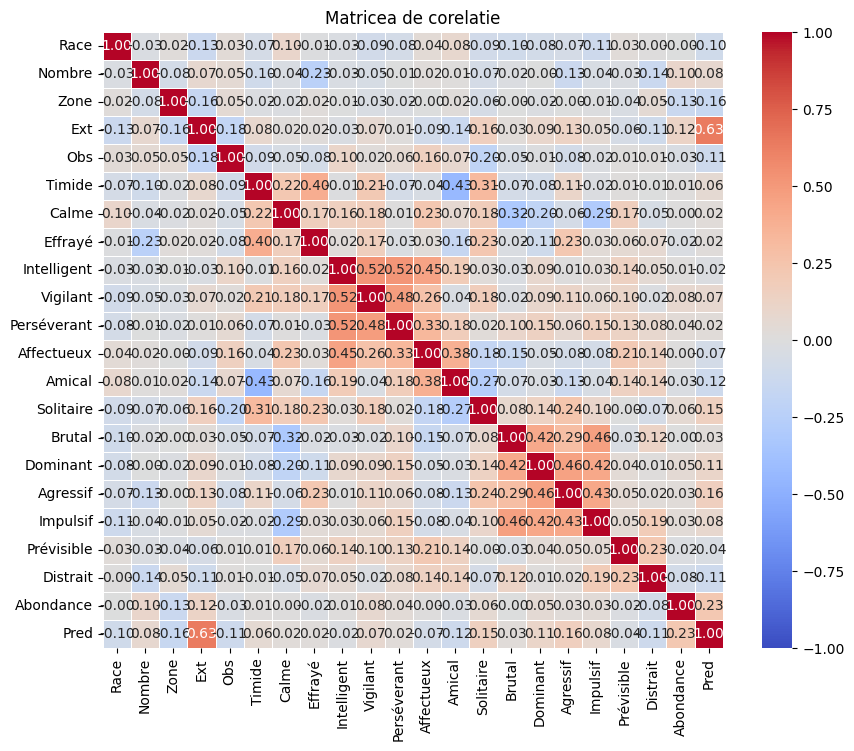

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)
correlation_matrix = data_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matricea de corelatie")
plt.show()

- Brutal si Impulsif
- Impulsigf si Dominant
- Solitaire si Timide
- Perseverant si Intelligent
- Effraye si Timide

- Transform Ext din ideea de cat timp sta afara in : 0 - nu ii prea place pe afara (prefera in casa) si 1 pentru pisicile care vor sa stea cat mai mult afara

Ext
0    1314
2     797
1     624
3     374
4      34
Name: count, dtype: int64


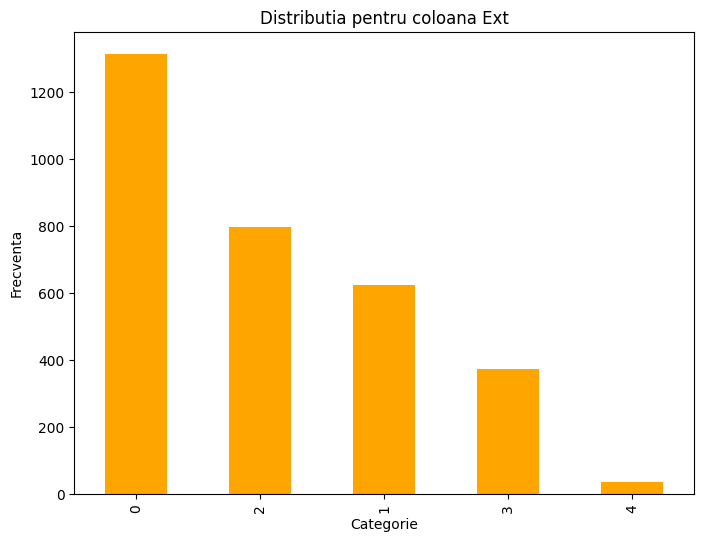

In [118]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

distributie = data_final['Ext'].value_counts()
print(distributie)

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Ext')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

In [120]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

data_final['Ext'] = data_final['Ext'].apply(lambda x: 1 if x > 1 else 0)

print(data_final['Ext'].value_counts())

output_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'  
data_final.to_excel(output_path, index=False)

print(f"Datele modificate au fost salvate in {output_path}")

Ext
0    1938
1    1205
Name: count, dtype: int64
Datele modificate au fost salvate in /Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx


Ext
0    1938
1    1205
Name: count, dtype: int64


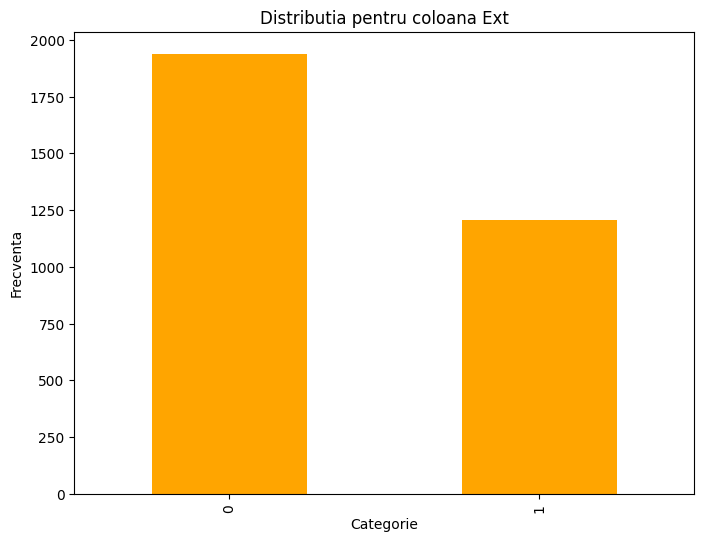

In [121]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

distributie = data_final['Ext'].value_counts()
print(distributie)

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Ext')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

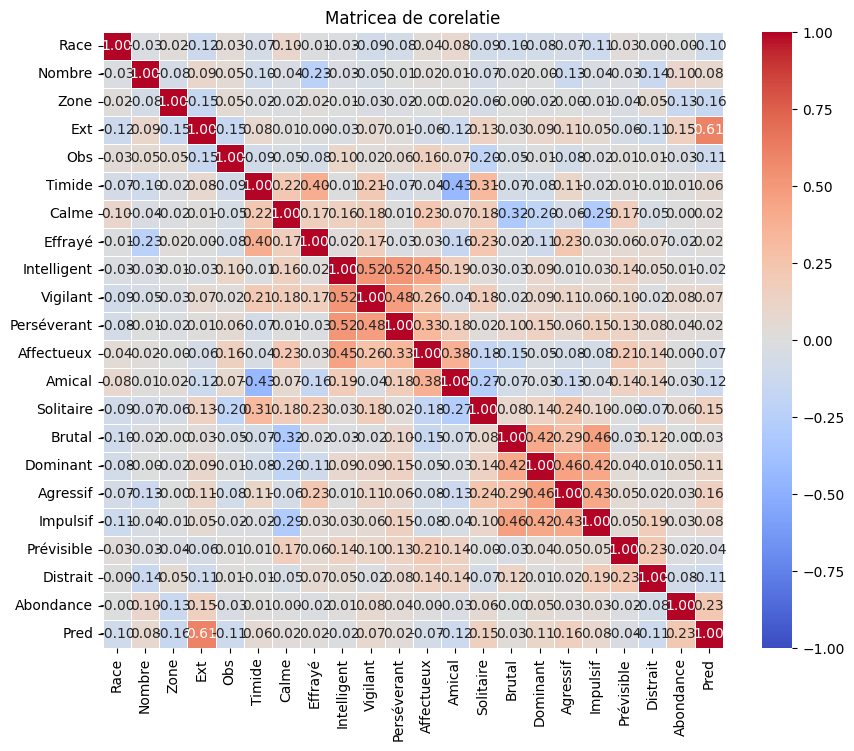

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)
correlation_matrix = data_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matricea de corelatie")
plt.show()

In [ ]:
"""
- Ext si Pred -> Pred si facem OR intre valori 
- Pred o sa insemne : 0 -> nu ii place sa stea pe afara sa vaneze
                      1 -> ii place sa stea pe afara sa vaneze 
"""

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

data_final['Pred'] = data_final['Pred'] | data_final['Ext']
data_final = data_final.drop(columns=['Ext'])
data_final.to_excel('/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx', index=False)

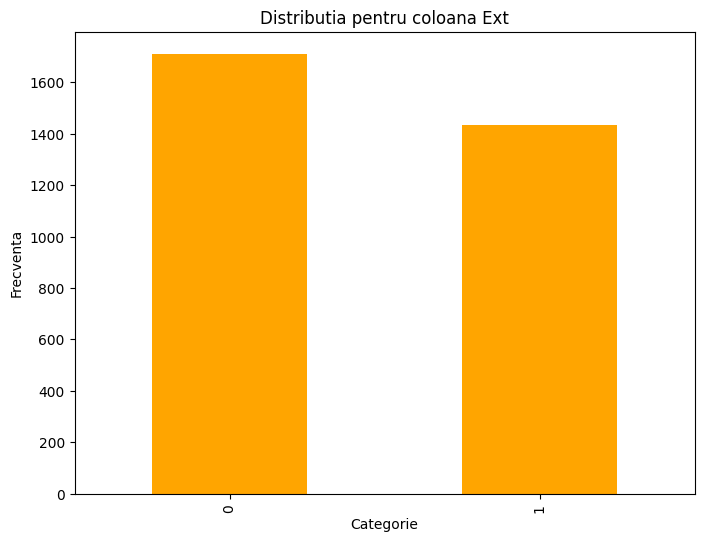

In [125]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

distributie = data_final['Pred'].value_counts()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Ext')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()



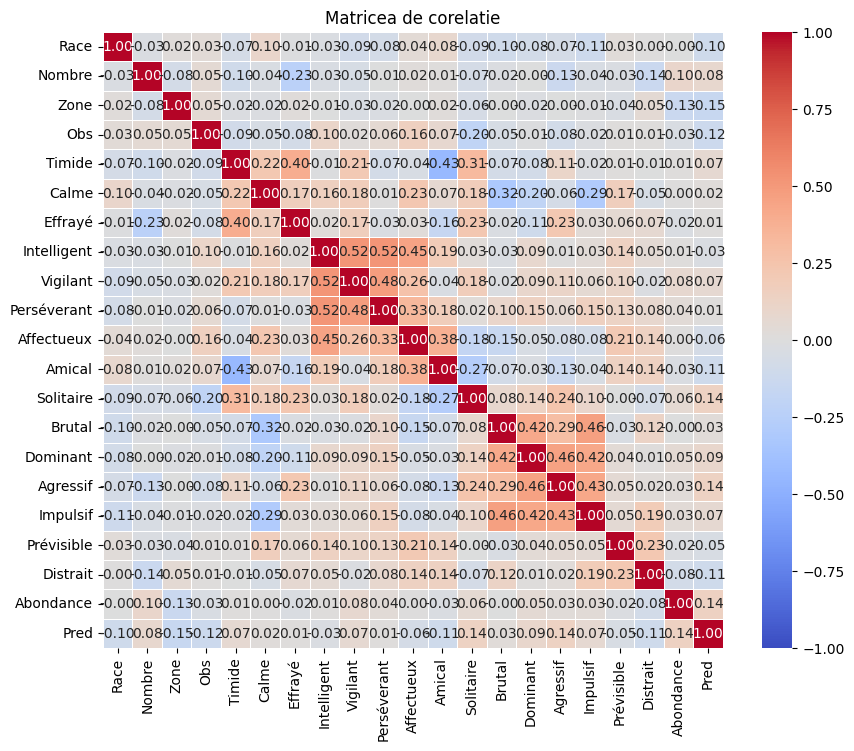

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)
correlation_matrix = data_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matricea de corelatie")
plt.show()

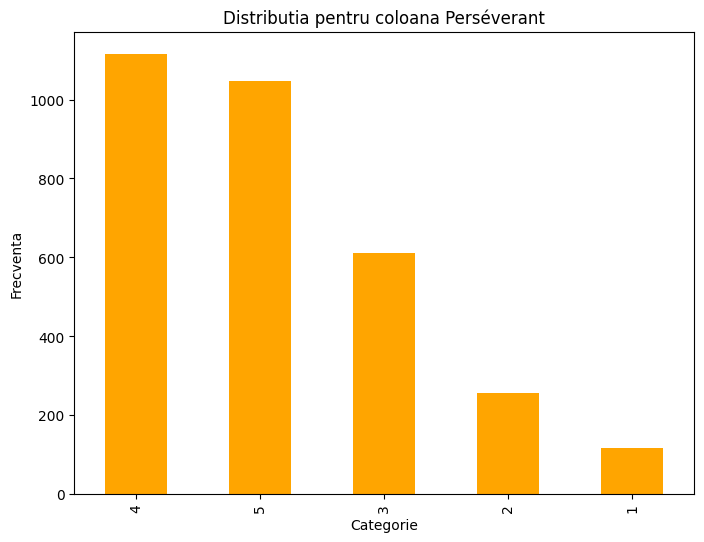

In [127]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

distributie = data_final['Perséverant'].value_counts()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Perséverant')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

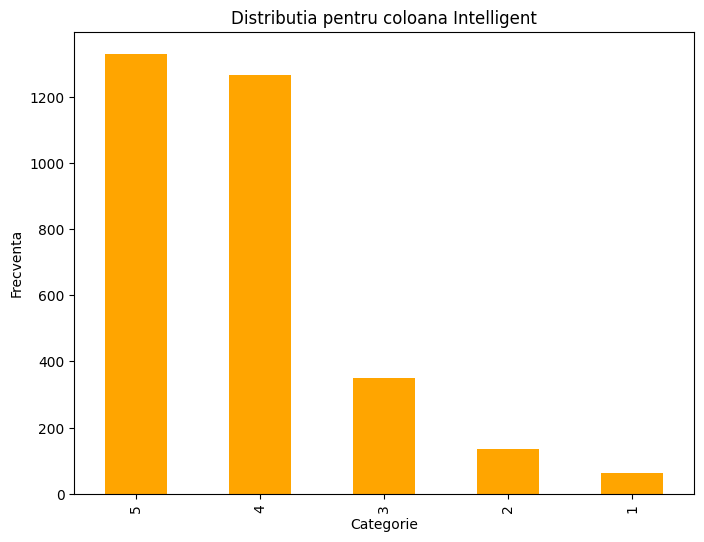

In [128]:
file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

distributie = data_final['Intelligent'].value_counts()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Intelligent')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

- Intelligent si Perseverent
- Perseverent si Vigilent

Inseamna ca o sa incerc cumva sa scap de Perseverent

- Effraye si Timide

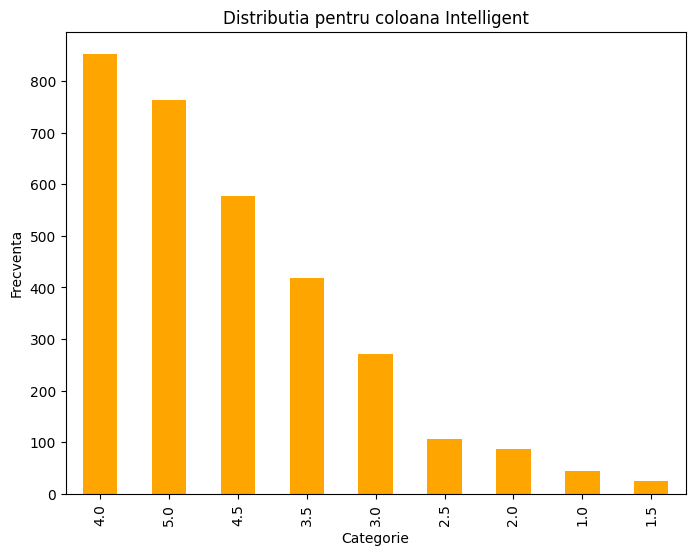

In [153]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

data_final['Intelligent'] = data_final[['Intelligent','Perséverant']].mean(axis=1)

distributie = data_final['Intelligent'].value_counts()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Intelligent')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

In [154]:
data_final['Intelligent'] = data_final['Intelligent'].apply(lambda x: 1 if x < 2 else x)

print(data_final['Intelligent'].value_counts())

Intelligent
4.0    853
5.0    763
4.5    578
3.5    418
3.0    270
2.5    106
2.0     87
1.0     68
Name: count, dtype: int64


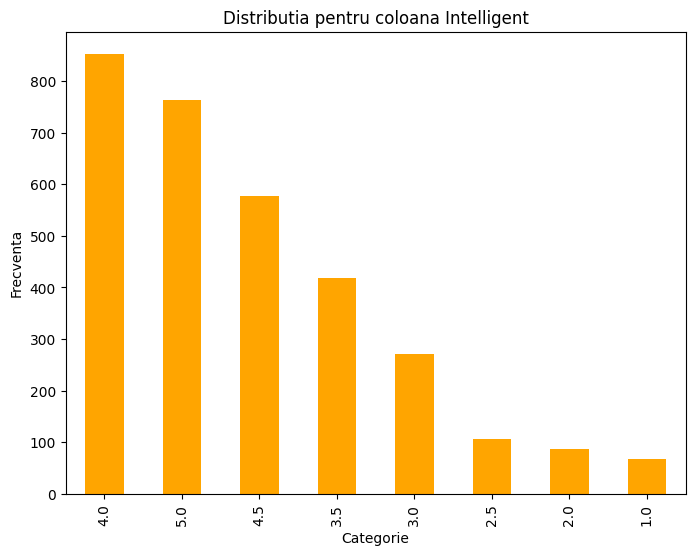

In [155]:
distributie = data_final['Intelligent'].value_counts()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Intelligent')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

In [156]:
data_final['Intelligent'] = data_final['Intelligent'].apply(lambda x: 1 if x < 2.5 else x)

print(data_final['Intelligent'].value_counts())

Intelligent
4.0    853
5.0    763
4.5    578
3.5    418
3.0    270
1.0    155
2.5    106
Name: count, dtype: int64


In [157]:
data_final['Intelligent'] = data_final['Intelligent'].apply(lambda x: 1 if x < 3.5 else x)
print(data_final['Intelligent'].value_counts())

Intelligent
4.0    853
5.0    763
4.5    578
1.0    531
3.5    418
Name: count, dtype: int64


In [158]:
data_final['Intelligent'] = data_final['Intelligent'].apply(lambda x: 2 if (x >= 3.5 and x<= 4.0) else x)
print(data_final['Intelligent'].value_counts())

Intelligent
2.0    1271
5.0     763
4.5     578
1.0     531
Name: count, dtype: int64


In [159]:
data_final['Intelligent'] = data_final['Intelligent'].apply(lambda x: 3 if (x >= 4.5 and x<= 5.0) else x)
print(data_final['Intelligent'].value_counts())

Intelligent
3.0    1341
2.0    1271
1.0     531
Name: count, dtype: int64


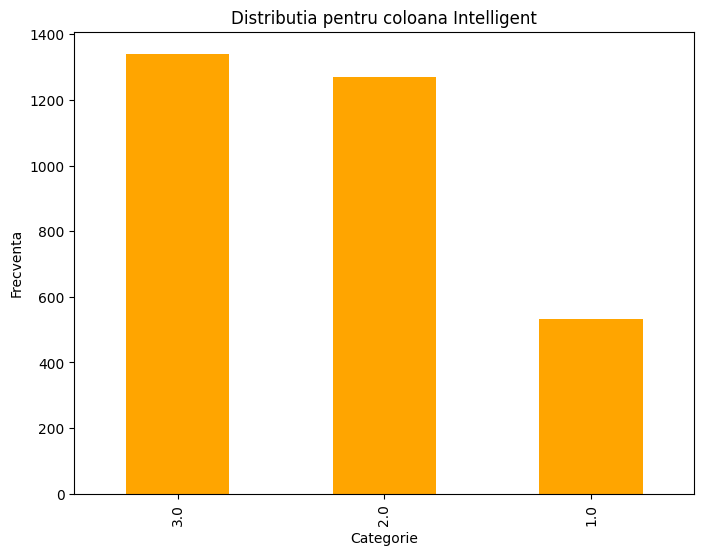

In [160]:
distributie = data_final['Intelligent'].value_counts()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Intelligent')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

In [161]:
output_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'  
data_final.to_excel(output_path, index=False)

print(f"Datele modificate au fost salvate in {output_path}")

Datele modificate au fost salvate in /Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx


In [162]:
import pandas as pd

path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(path)

print(data_final['Intelligent'].value_counts())

Intelligent
3    1341
2    1271
1     531
Name: count, dtype: int64


- Am combinat intelligent cu perseverent -> scot perseverant de tot

In [173]:
path = path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(path)

data_final = data_final.drop(columns=['Perséverant'])

data_final.to_excel('/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx', index=False)





In [174]:
path = path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(path)

atribute = data_final.columns
atribute_formatate = " | ".join(atribute)
print("Atributele din setul de date sunt:")
print(atribute_formatate)

Atributele din setul de date sunt:
Race | Nombre | Zone | Obs | Timide | Calme | Effrayé | Intelligent | Vigilant | Affectueux | Amical | Solitaire | Brutal | Dominant | Agressif | Impulsif | Prévisible | Distrait | Abondance | Pred


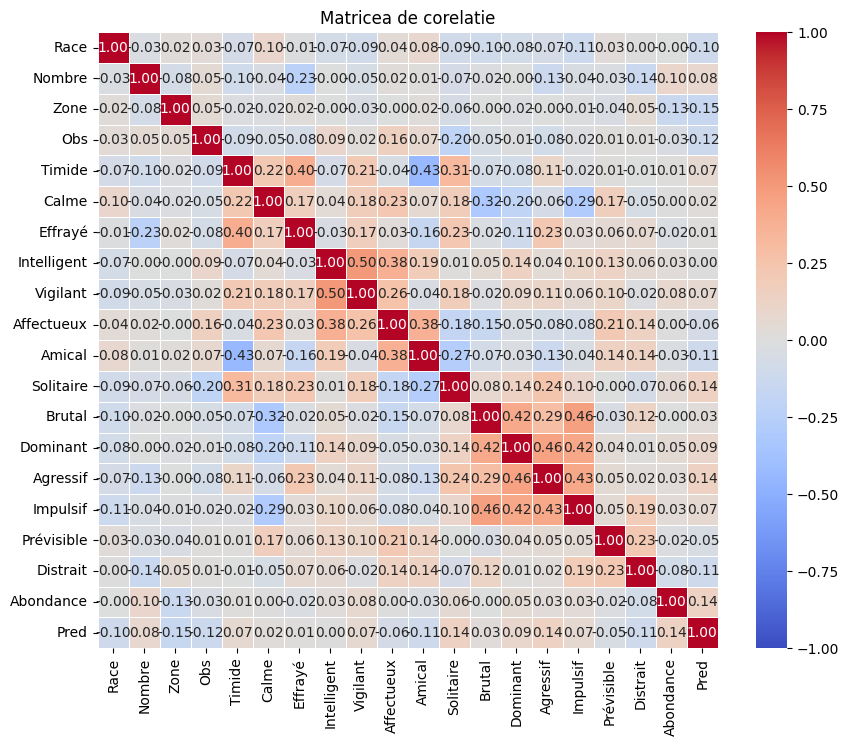

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)
correlation_matrix = data_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matricea de corelatie")
plt.show()

Vigilant si Intelligent -> Intelligent

In [241]:
file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

print(data_final['Vigilant'].value_counts())

Vigilant
4    1212
5    1048
3     477
2     275
1     131
Name: count, dtype: int64


In [242]:
print(data_final['Intelligent'].value_counts())

Intelligent
3    1341
2    1271
1     531
Name: count, dtype: int64


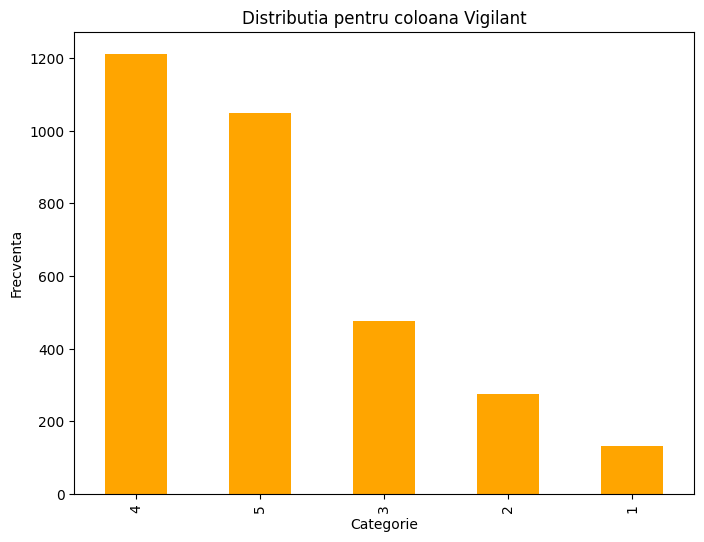

In [243]:
distributie = data_final['Vigilant'].value_counts()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Vigilant')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

In [244]:
data_final['Vigilant'] = data_final['Vigilant'].apply(lambda x: 1 if x <= 3 else x)
print(data_final['Vigilant'].value_counts())

Vigilant
4    1212
5    1048
1     883
Name: count, dtype: int64


In [245]:
data_final['Vigilant'] = data_final['Vigilant'].apply(lambda x: 2 if x == 4 else x)
print(data_final['Vigilant'].value_counts())

Vigilant
2    1212
5    1048
1     883
Name: count, dtype: int64


In [246]:
data_final['Vigilant'] = data_final['Vigilant'].apply(lambda x: 3 if x == 5 else x)
print(data_final['Vigilant'].value_counts())

Vigilant
2    1212
3    1048
1     883
Name: count, dtype: int64


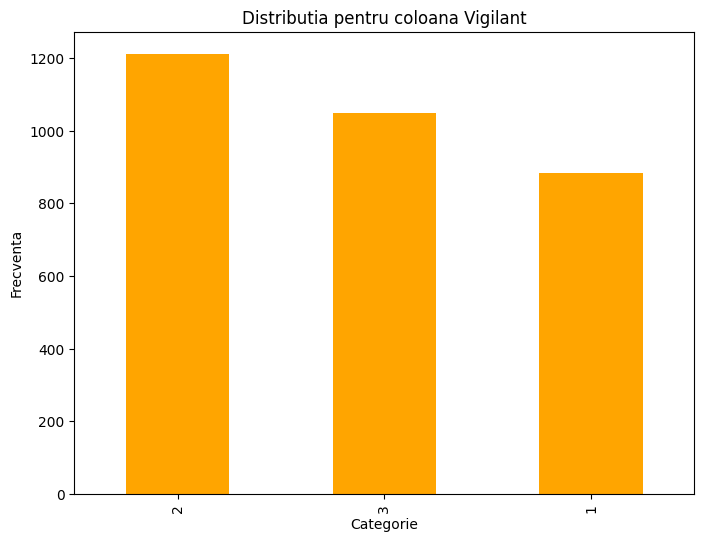

In [247]:
distributie = data_final['Vigilant'].value_counts()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Vigilant')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

In [248]:
data_final.to_excel('/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx', index=False)

In [249]:
path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(path)

print(data_final['Vigilant'].value_counts())

Vigilant
2    1212
3    1048
1     883
Name: count, dtype: int64


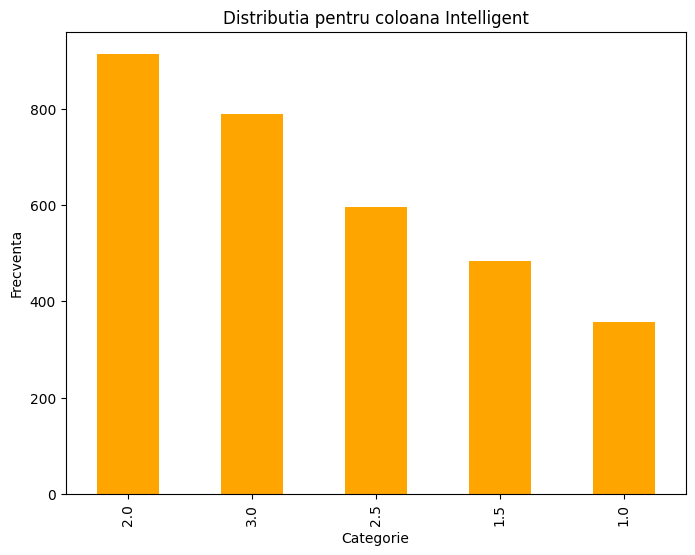

In [251]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

data_final['Intelligent'] = data_final[['Intelligent','Vigilant']].mean(axis=1)

distributie = data_final['Intelligent'].value_counts()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Intelligent')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

- Modific Intelligent

In [255]:
data_final['Intelligent'] = data_final['Intelligent'].apply(lambda x: 2 if x == 1.5 else x)

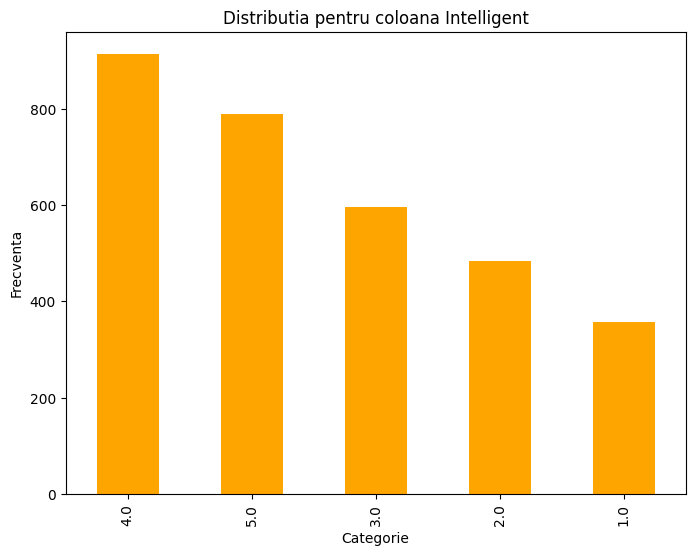

In [256]:
distributie = data_final['Intelligent'].value_counts()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Intelligent')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

In [257]:
data_final.to_excel('/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx', index=False)

In [262]:
data_final = data_final.drop(columns=['Vigilant'])
data_final.to_excel('/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx', index=False)

In [263]:
file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

print(data_final.columns)

Index(['Race', 'Nombre', 'Zone', 'Obs', 'Timide', 'Calme', 'Effrayé',
       'Intelligent', 'Affectueux', 'Amical', 'Solitaire', 'Brutal',
       'Dominant', 'Agressif', 'Impulsif', 'Prévisible', 'Distrait',
       'Abondance', 'Pred'],
      dtype='object')


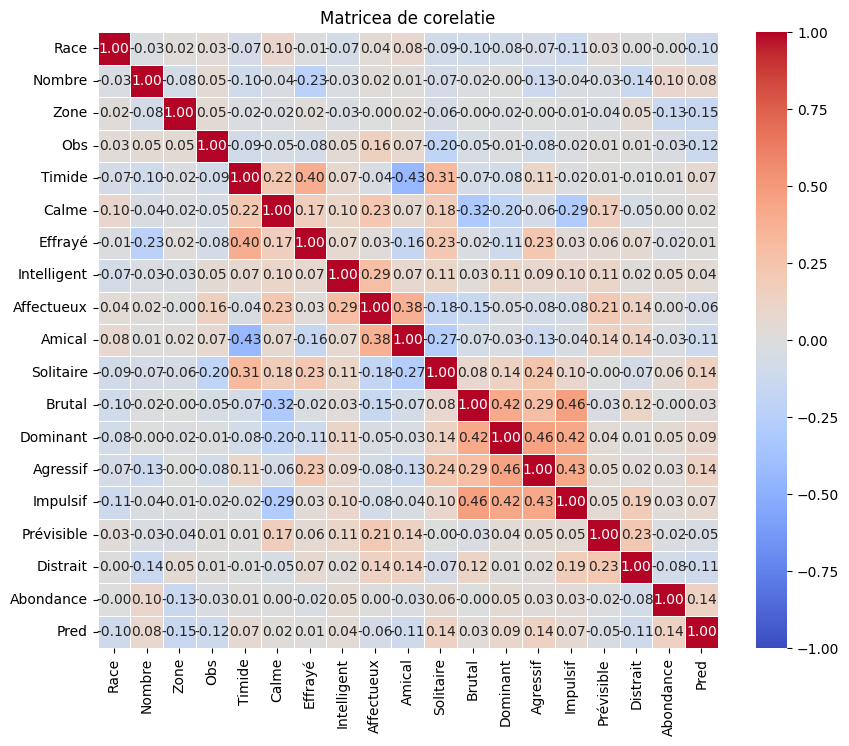

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)
correlation_matrix = data_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matricea de corelatie")
plt.show()

Intelligent contine si vigilent acum 

Impulsif si brutal merg combinate si atributul nou se va numi Impulsif

In [279]:
file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)

In [280]:
print(data_final['Impulsif'].value_counts())

Impulsif
1    1009
3     689
2     674
4     585
5     186
Name: count, dtype: int64


In [281]:
print(data_final['Brutal'].value_counts())

Brutal
1    1748
2     605
3     436
4     273
5      81
Name: count, dtype: int64


In [282]:
data_final['Impulsif'] = data_final[['Impulsif','Brutal']].mean(axis=1)

distributie = data_final['Impulsif'].value_counts()
print(distributie)

Impulsif
1.0    860
2.0    562
1.5    446
2.5    395
3.0    382
3.5    230
4.0    168
4.5     70
5.0     30
Name: count, dtype: int64


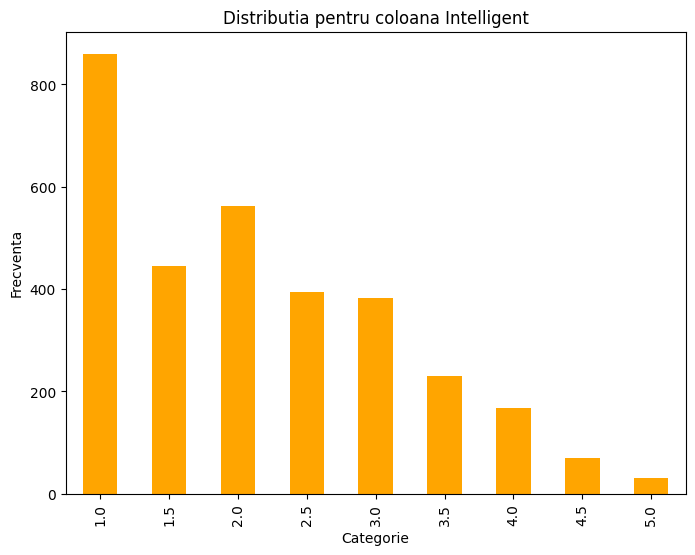

In [286]:
distributie = data_final['Impulsif'].value_counts().sort_index()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Intelligent')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()


In [287]:
data_final['Impulsif'] = data_final['Impulsif'].apply(lambda x: 1 if x < 2 else x)

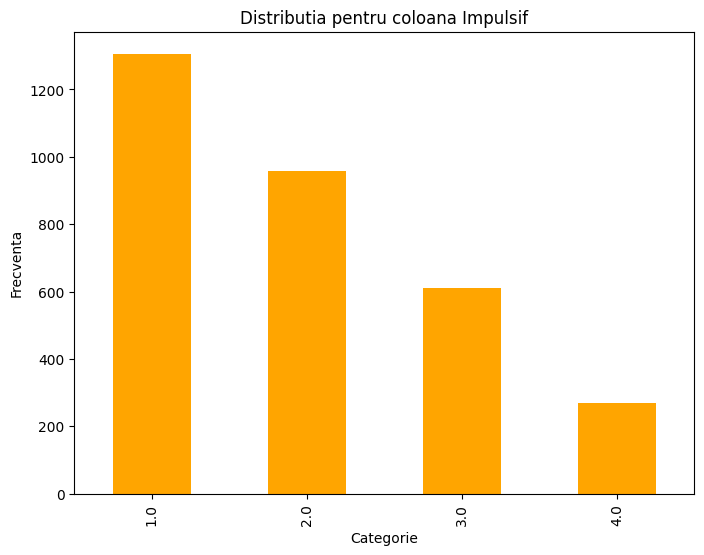

In [297]:
distributie = data_final['Impulsif'].value_counts().sort_index()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Impulsif')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()


In [295]:
data_final['Impulsif'] = data_final['Impulsif'].apply(lambda x: 4 if x == 4 or x==5.0 else x)

In [298]:
data_final.to_excel('/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx', index=False)

In [301]:
data_final = data_final.drop(columns=['Brutal'])

In [302]:
data_final.to_excel('/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx', index=False)

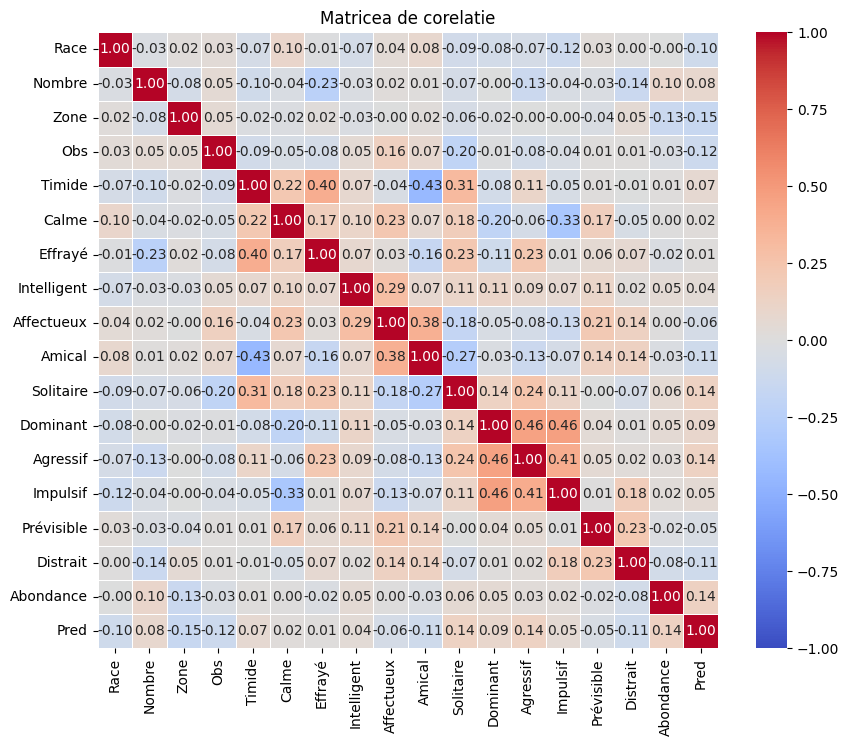

In [303]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)
correlation_matrix = data_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matricea de corelatie")
plt.show()

Dominant si Impulsif -> Dominant

In [307]:
print(data_final['Agressif'].value_counts())

Agressif
1    1165
3     869
2     570
4     368
5     171
Name: count, dtype: int64


In [305]:
print(data_final['Dominant'].value_counts())

Dominant
1    1003
3     721
4     587
2     570
5     262
Name: count, dtype: int64


In [308]:
data_final['Dominant'] = data_final[['Dominant','Agressif']].mean(axis=1)

distributie = data_final['Dominant'].value_counts()
print(distributie)

Dominant
1.0    670
2.0    547
3.0    501
2.5    421
3.5    308
1.5    282
4.0    237
4.5    104
5.0     73
Name: count, dtype: int64


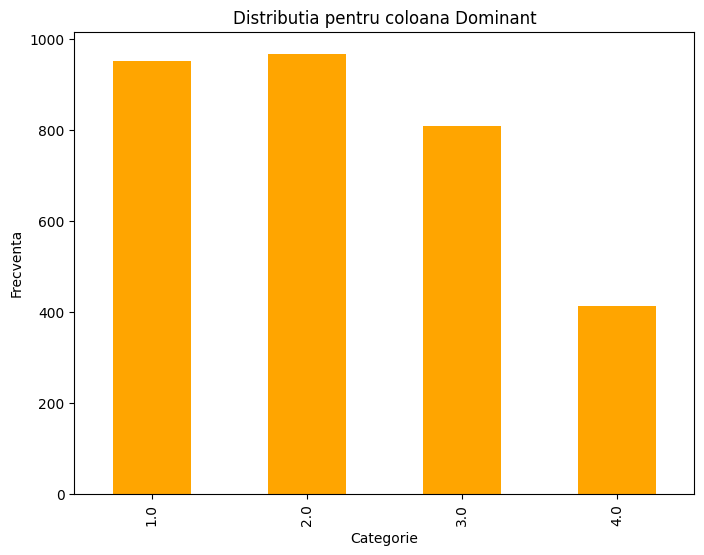

In [319]:
distributie = data_final['Dominant'].value_counts().sort_index()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Dominant')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()


In [318]:
data_final['Dominant'] = data_final['Dominant'].apply(lambda x: 4 if x == 5 else x)

In [323]:
data_final.to_excel('/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx', index=False)

In [322]:
data_final = data_final.drop(columns=['Agressif'])

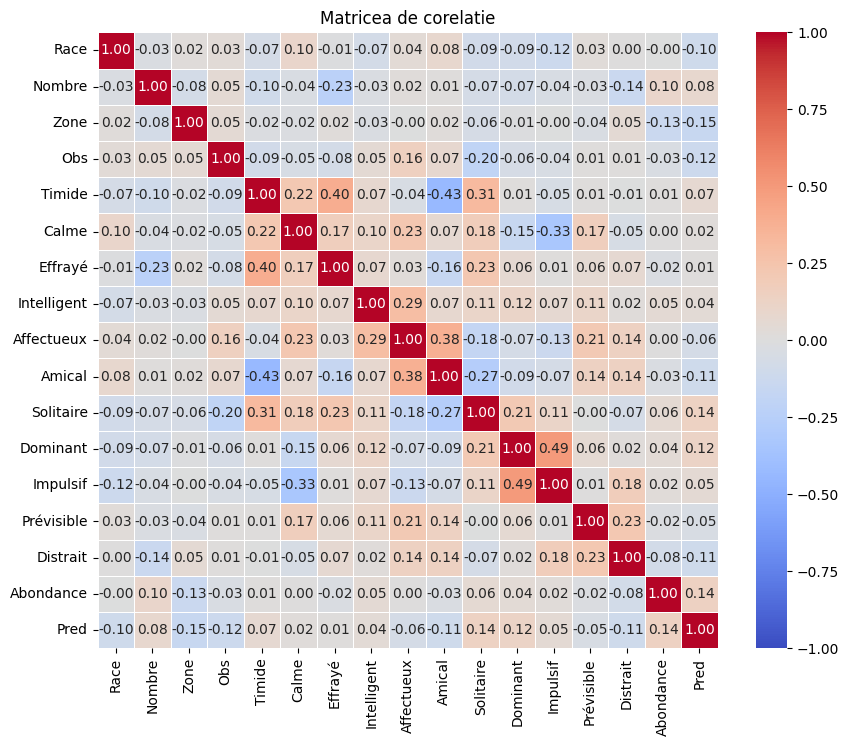

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)
correlation_matrix = data_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matricea de corelatie")
plt.show()

In [348]:
print(data_final['Impulsif'].value_counts())

Impulsif
1    1306
2     957
3     612
4     268
Name: count, dtype: int64


In [349]:
print(data_final['Dominant'].value_counts())

Dominant
2    968
1    952
3    809
4    414
Name: count, dtype: int64


In [350]:
data_final['Impulsif'] = data_final[['Impulsif','Dominant']].mean(axis=1)
distributie = data_final['Impulsif'].value_counts()
print(distributie)

Impulsif
1.0    682
2.0    629
1.5    584
2.5    493
3.0    403
3.5    232
4.0    120
Name: count, dtype: int64


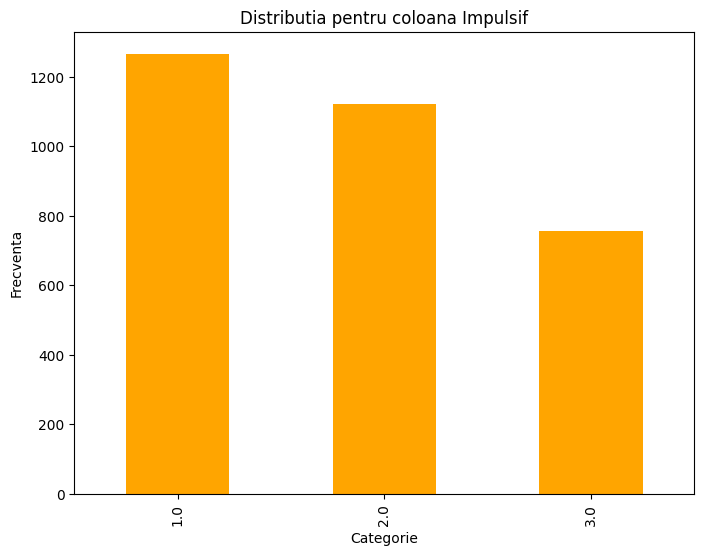

In [357]:
distributie = data_final['Impulsif'].value_counts().sort_index()

distributie.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distributia pentru coloana Impulsif')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

In [356]:
data_final['Impulsif'] = data_final['Impulsif'].apply(lambda x: 3 if x == 4 else x)

In [368]:
data_final.to_excel('/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx', index=False)

In [367]:
data_final = data_final.drop(columns=['Dominant'])


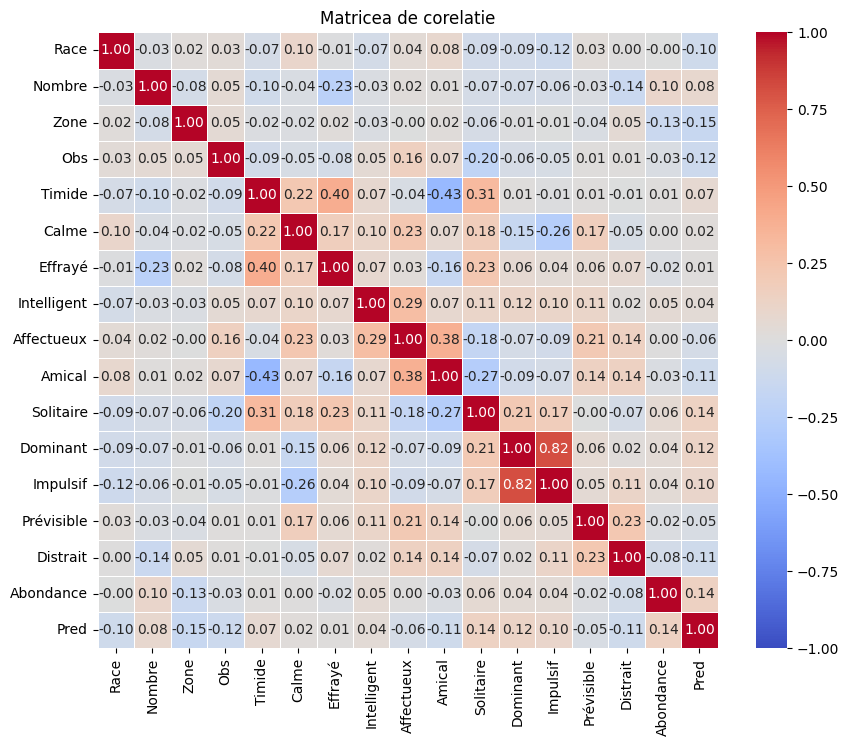

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_final_v1.xlsx'
data_final = pd.read_excel(file_path)
correlation_matrix = data_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matricea de corelatie")
plt.show()